In [1]:
import tensorflow as tf
import pickle
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.models import Model
from glob import glob
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
train_data_generator= ImageDataGenerator(rescale = 1./255,
                                        shear_range = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip = True)

import pydicom
import scipy
import cv2
import skimage



2.7.0


Number of output classes is:  2
148
40


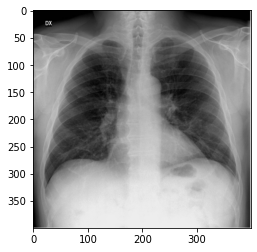

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 199, 199, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 49, 49, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 36864)             0         
                                       

In [10]:
training_data_path = '/Users/sipebradford/Downloads/Covid-19-detection-from-chest-xray/xray_dataset_covid19/train'
test_data_path = '/Users/sipebradford/Downloads/Covid-19-detection-from-chest-xray/xray_dataset_covid19/test'

output_classes = len(glob(training_data_path + '/*'))
print('Number of output classes is: ', output_classes)

training_files = glob(training_data_path + '/*/*')
test_files = glob(test_data_path + '/*/*')
print(len(training_files))
print(len(test_files))

test_image = Image.open(training_files[0])
test_image = test_image.resize((400,400))

plt.imshow(test_image)
plt.show()

test_data_generator = ImageDataGenerator(rescale = 1./255)

training_data = train_data_generator.flow_from_directory(training_data_path, target_size = (400,400), batch_size = 4, class_mode = 'binary')

test_data = train_data_generator.flow_from_directory(test_data_path, target_size = (400,400), batch_size = 4, class_mode = 'binary')

#build model architecture
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), strides = 2, activation = 'relu', input_shape= (400, 400, 3)))
#input_layer = Input(shape = (400,400,3))
#conv1 = Conv2D(32, (3,3), strides = 2, activation = 'relu')(input_layer)
maxpool1 = MaxPool2D(2,2)(conv1)
model.add(tf.keras.layers.MaxPool2D(2, 2))
#conv2 = Conv2D(64, (3,3), strides = 2, activation = 'relu')(maxpool1)
model.add(tf.keras.layers.Conv2D(64, (3,3), strides = 2, activation = 'relu'))

#maxpool2 = MaxPool2D(pool_size = (2, 2))(conv2)
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2)))

#flat1 = Flatten()(maxpool2)
model.add(tf.keras.layers.Flatten())
#dense1 = Dense(256, activation = 'relu')(flat1)
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
#output_layer = Dense(1, activation = 'sigmoid')(dense1)
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
#model = Model(input_layer, output_layer)
print(model.summary())

(array([[[[0.5373501 , 0.5373501 , 0.5373501 ],
         [0.46012634, 0.46012634, 0.46012634],
         [0.38968056, 0.38968056, 0.38968056],
         ...,
         [0.08401169, 0.08401169, 0.08401169],
         [0.07858591, 0.07858591, 0.07858591],
         [0.03472562, 0.03472562, 0.03472562]],

        [[0.538272  , 0.538272  , 0.538272  ],
         [0.46011415, 0.46011415, 0.46011415],
         [0.38854164, 0.38854164, 0.38854164],
         ...,
         [0.08344539, 0.08344539, 0.08344539],
         [0.07876726, 0.07876726, 0.07876726],
         [0.03484849, 0.03484849, 0.03484849]],

        [[0.53326565, 0.53326565, 0.53326565],
         [0.45873952, 0.45873952, 0.45873952],
         [0.38931203, 0.38931203, 0.38931203],
         ...,
         [0.08117644, 0.08117644, 0.08117644],
         [0.07522461, 0.07522461, 0.07522461],
         [0.03313822, 0.03313822, 0.03313822]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.00212694, 0.00212694, 0.00212694

In [36]:
#compiling the CNN model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(training_data, epochs = 10, validation_data = test_data, verbose = 1)

print(model_history.history['accuracy'])

test_loss, test_acc = model.evaluate(test_data, verbose=2)

print("Model Loss: {}".format(test_loss))

print("Model Accuracy: {}".format(test_acc))



#filename = 'finalized_model2.sav'
#pickle.dump(model, open(filename, 'wb'))

Epoch 1/10
37/37 [==============================] - 26s 698ms/step - loss: 0.1259 - accuracy: 0.9324 - val_loss: 0.3334 - val_accuracy: 0.8250
Epoch 2/10
37/37 [==============================] - 28s 768ms/step - loss: 0.1237 - accuracy: 0.9662 - val_loss: 0.0551 - val_accuracy: 0.9750
Epoch 3/10
37/37 [==============================] - 26s 697ms/step - loss: 0.1476 - accuracy: 0.9459 - val_loss: 0.0319 - val_accuracy: 1.0000
Epoch 4/10
37/37 [==============================] - 25s 672ms/step - loss: 0.1104 - accuracy: 0.9595 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 5/10
37/37 [==============================] - 20s 550ms/step - loss: 0.2102 - accuracy: 0.9459 - val_loss: 0.0416 - val_accuracy: 0.9750
Epoch 6/10
37/37 [==============================] - 21s 561ms/step - loss: 0.1688 - accuracy: 0.9595 - val_loss: 0.0615 - val_accuracy: 0.9750
Epoch 7/10
37/37 [==============================] - 23s 629ms/step - loss: 0.1689 - accuracy: 0.9459 - val_loss: 0.0887 - val_accuracy: 0.9750